In [37]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

In [12]:
prediction_img = nib.load('/home/daryl/datasets/RNSH_HFlung/nnU-Net-processing/nnUNet_predictions/Dataset138_RNSH_HFlung/post/RNSH_HFlung_0001.nii.gz').get_fdata()

In [14]:
label_img = nib.load('/home/daryl/datasets/RNSH_HFlung/nnU-Net-processing/nnUNet_raw/Dataset138_RNSH_HFlung/labelsTs/RNSH_HFlung_0001.nii.gz').get_fdata()

In [23]:
DISPLAY_IDX = 200

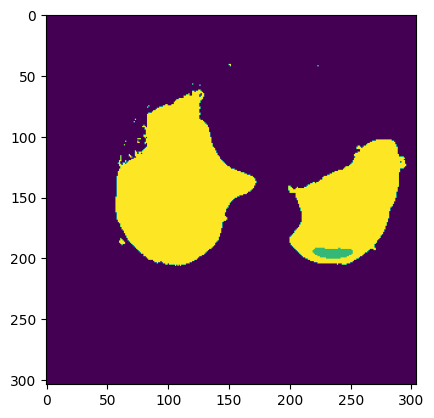

In [24]:
plt.imshow(prediction_img[:,:,DISPLAY_IDX])
plt.show()

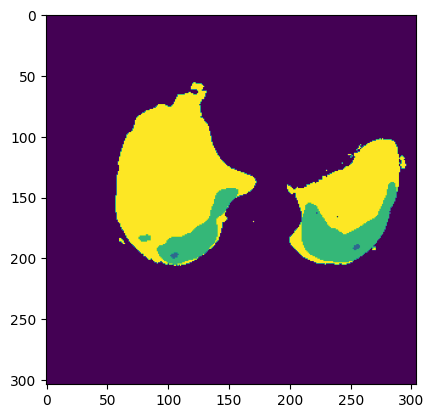

In [25]:
plt.imshow(label_img[:,:,DISPLAY_IDX])
plt.show()

In [77]:
seg = prediction_img.ravel()
gt = label_img.ravel()

In [87]:
foreground_idxs = gt > 0

sp = spearmanr(seg[foreground_idxs], gt[foreground_idxs])
np.round(sp[0],2)

0.43

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [74]:
cm = confusion_matrix(label_img.ravel(), prediction_img.ravel())
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

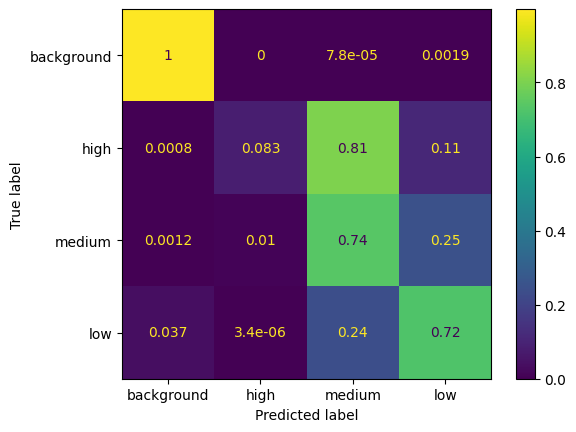

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['background','high','medium','low'])
disp.plot()
plt.show()

In [90]:
for idx,label in enumerate(['high','medium','low']):
    k = idx+1
    dice = np.sum(seg[gt==k]==k)*2.0 / (np.sum(seg[seg==k]==k) + np.sum(gt[gt==k]==k))
    print('{}: {}'.format(label, round(dice,2)))

high: 0.13
medium: 0.65
low: 0.78
